In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# losowe dane dla dwóch klas, przy przesunięciu środka rozkładu
train_data = np.vstack((np.random.normal(size=(100, 2)),
                        np.random.normal(size=(100, 2), loc=2)))
train_labels = np.hstack((np.zeros(100), np.ones(100)))

In [ ]:
train_data.shape

(200, 2)

In [ ]:
train_labels.shape

(200,)

In [ ]:
train_data[:5]

array([[ 0.82661159,  2.32656929],
       [ 1.15916102, -0.60438505],
       [-0.16610044, -1.3156908 ],
       [-1.09234171, -1.39274524],
       [ 0.30012263, -1.13084009]])

In [ ]:
train_labels[:5]

array([0., 0., 0., 0., 0.])

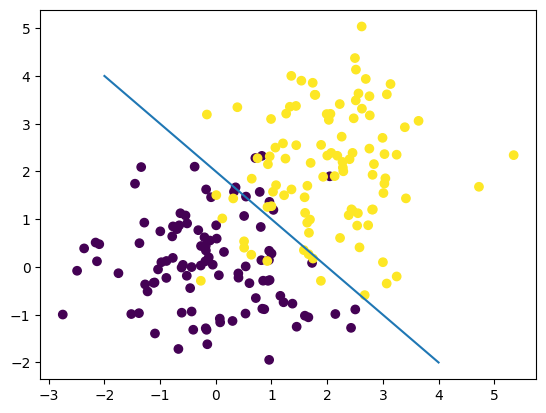

In [ ]:
fig, ax = plt.subplots()
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels)
ax.plot(range(-2, 5), range(4, -3, -1))
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_data, train_labels)

LogisticRegression()

Funkcja ta zwraca meshgrid (czyli listę indeksów punktów z zadanego przedziału) na podstawie wygenerowanego zbioru danych.

In [ ]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


In [ ]:
train_data[:, 0].min()

-2.7481281786200813

In [ ]:
xs, ys = get_grid(train_data)

In [ ]:
xs

array([[-3.74812818, -3.73812818, -3.72812818, ...,  6.32187182,
         6.33187182,  6.34187182],
       [-3.74812818, -3.73812818, -3.72812818, ...,  6.32187182,
         6.33187182,  6.34187182],
       [-3.74812818, -3.73812818, -3.72812818, ...,  6.32187182,
         6.33187182,  6.34187182],
       ...,
       [-3.74812818, -3.73812818, -3.72812818, ...,  6.32187182,
         6.33187182,  6.34187182],
       [-3.74812818, -3.73812818, -3.72812818, ...,  6.32187182,
         6.33187182,  6.34187182],
       [-3.74812818, -3.73812818, -3.72812818, ...,  6.32187182,
         6.33187182,  6.34187182]])

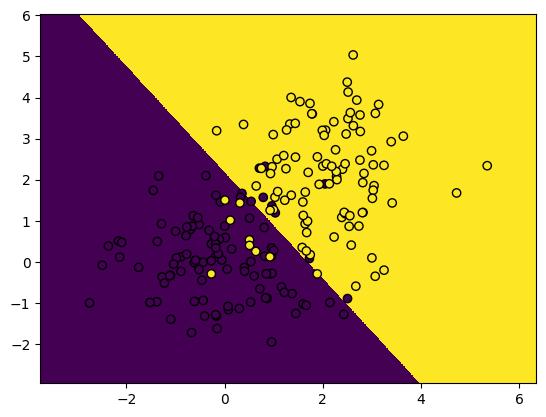

In [ ]:
predicted = model.predict(
    np.column_stack((xs.flatten(),
                     ys.flatten()))).reshape(xs.shape)

fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, predicted)
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolors='k')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'/content/drive/MyDrive/Learning/CSV/ML_datasets/{filename}.csv', index_col=index_col)
    # Print the column names to verify if 'Class' exists and correct any typos
    print(dataset.columns)
    # Adjust the 'class_column' based on the printed output if needed
    dataset['target'] = dataset[class_column].astype('category').cat.codes # Rename the created column to 'target'
    classes = dataset.pop(class_column).unique()
    return dataset, classes

def prepare_dataset(dataset_name):
    params = {'iris': {'class_column': 'Species', 'index_col': None},
              'wine': {'class_column': 'class', 'index_col': None},
              'glass': {'class_column': 'Type', 'index_col': None},
              'diabetes': {'class_column': 'Outcome', 'index_col': None}}
    dataset, classes = load_dataset(dataset_name,
                                    **params[dataset_name])
    y = dataset.pop('target') # Pop the 'target' column instead of 'class'
    X = dataset
    return X, y, classes

X, y, classes = prepare_dataset('diabetes')
print(X.head(1))
print(y.head(1))
print(classes)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
0    1
Name: target, dtype: int8
[1 0]


In [ ]:
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [ ]:
y.head(2)

0    1
1    0
Name: target, dtype: int8

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 1 0 0 1 1]


In [ ]:
y_test.to_numpy()

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int8)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<Axes: >

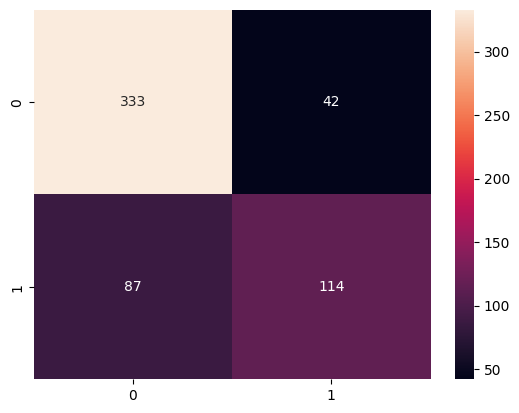

In [ ]:
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d')

Dane użyte: Zbiór treningowy (X_train, y_train).
Przewidywania: Predykcje modelu na danych treningowych (y_pred_train).
Macierz ta pokazuje, jak dobrze model radzi sobie z danymi, na których był trenowany. Może wskazywać, jak dobrze model nauczył się wzorców w danych treningowych. Wysoka dokładność może sugerować dobrą jakość dopasowania, ale może także wskazywać na przetrenowanie (overfitting).

<Axes: >

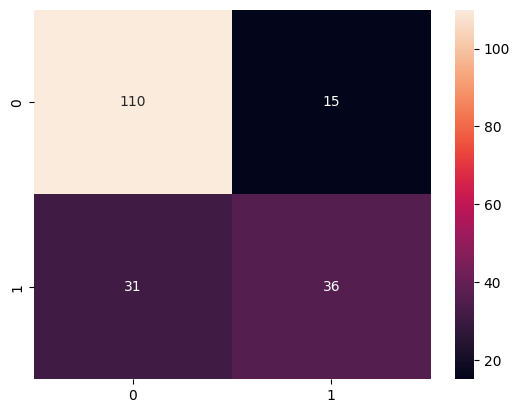

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

Dane użyte: Zbiór testowy (X_test, y_test).
Przewidywania: Predykcje modelu na danych testowych (y_pred).
Macierz ta pokazuje, jak dobrze model radzi sobie z nowymi, niewidzianymi wcześniej danymi. Jest to rzeczywista miara skuteczności modelu, ponieważ ocenia jego zdolność do generalizacji na podstawie danych, które nie były używane podczas trenowania.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.7760416666666666
Precision: 0.7307692307692307
Recall: 0.5671641791044776
F1-Score: 0.6386554621848739


In [ ]:
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.7604166666666666
Precision: 0.7058823529411765
Recall: 0.5373134328358209
F1-Score: 0.6101694915254238


In [ ]:
df_dict = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
df

,accuracy,precision,recall,f1
train,0.776042,0.730769,0.567164,0.638655
test,0.760417,0.705882,0.537313,0.610169


In [ ]:
melted = pd.melt(df.reset_index(), id_vars='index', var_name='metric')
melted

,index,metric,value
0,train,accuracy,0.776042
1,test,accuracy,0.760417
2,train,precision,0.730769
3,test,precision,0.705882
4,train,recall,0.567164
5,test,recall,0.537313
6,train,f1,0.638655
7,test,f1,0.610169


<Axes: xlabel='metric', ylabel='value'>

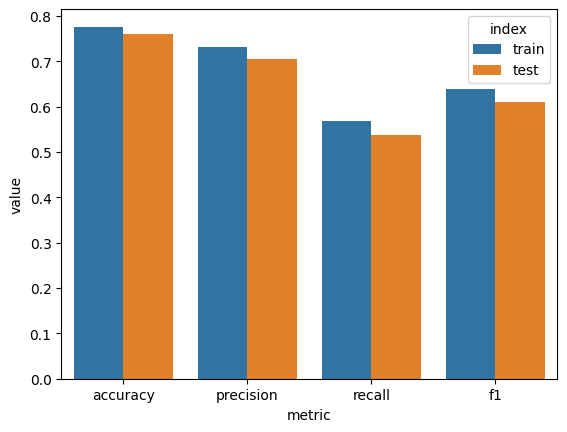

In [ ]:
sns.barplot(x='metric', y='value', hue='index', data=melted)

Regresja logistyczna - zastosowanie dla zbiorów o wielu etykietach. Strategia One versus Rest (trenowanie tyle klasyfikatorów, ile klas) - sklearn robi to automatycznie.



In [ ]:
X1, y1, classes1 = prepare_dataset('iris')

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [ ]:
classes1

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, stratify=y)

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_train1 = model1.predict(X_train1)
y_pred1 = model1.predict(X_test1)
print(y_pred1)
print(y_test1.to_numpy())

[1 0 0 2 1 0 0 1 2 0 2 0 2 2 2 1 2 0 2 0 0 2 1 1 2 2 2 0 1 1 1 2 1 0 1 0 1
 1]
[1 0 0 2 1 0 0 1 2 0 2 0 2 2 2 1 2 0 2 0 0 2 1 1 2 2 2 0 1 1 1 2 1 0 1 0 1
 1]


<Axes: >

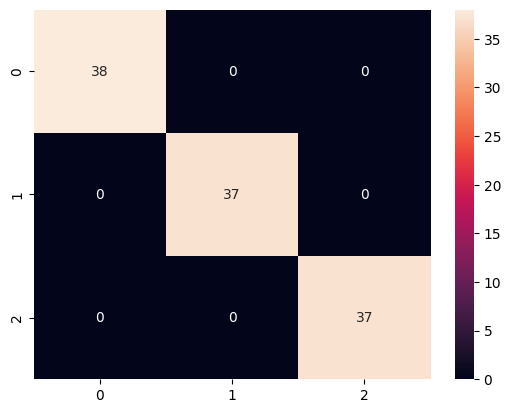

In [ ]:
cm_train = confusion_matrix(y_train1, y_pred_train1)
sns.heatmap(cm_train, annot=True)

<Axes: >

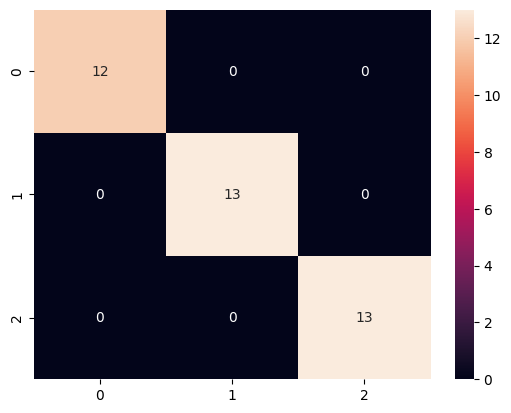

In [ ]:
cm = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm, annot=True)

In [ ]:
# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')
f1_train = f1_score(y_train, y_pred_train, average='micro')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1-Score: {f1_train}')

Accuracy: 0.7760416666666666
Precision: 0.7760416666666666
Recall: 0.7760416666666666
F1-Score: 0.7760416666666666


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, average='micro')
recall_test = recall_score(y_test, y_pred, average='micro')
f1_test = f1_score(y_test, y_pred, average='micro')

print(f'Accuracy: {accuracy_test}')
print(f'Precision: {precision_test}')
print(f'Recall: {recall_test}')
print(f'F1-Score: {f1_test}')

Accuracy: 0.7604166666666666
Precision: 0.7604166666666666
Recall: 0.7604166666666666
F1-Score: 0.7604166666666666


In [ ]:
df_dict = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
melted = pd.melt(df.reset_index(), id_vars='index', var_name='metric')
melted

,index,metric,value
0,train,accuracy,0.776042
1,test,accuracy,0.760417
2,train,precision,0.776042
3,test,precision,0.760417
4,train,recall,0.776042
5,test,recall,0.760417
6,train,f1,0.776042
7,test,f1,0.760417
